In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

## 0. Introduction
-------------------

> This example is based on Example 2.5 from pp. 33 ~ 34 in chapter 2.

## 1. Parameters
-----

In [17]:
f = np.array([0.1, 0.0, -0.1]).reshape((-1, 1))
vols = np.array([0.3, 0.3, 0.3])
C = np.array([1., 0.5, 0.5, 0.5, 1., 0.5, 0.5, 0.5, 1.]).reshape((-1, 3))
sigma = np.diag(vols) @ C @ np.diag(vols)

In [18]:
print(f"Return forecasts: \n{f.flatten()}")
print(f"Covariance matrix: \n{sigma}")

Return forecasts: 
[ 0.1  0.  -0.1]
Covariance matrix: 
[[0.09  0.045 0.045]
 [0.045 0.09  0.045]
 [0.045 0.045 0.09 ]]


## 2. Investment Strategies
----------------------

In [20]:
def full_invest(sigma, f, lamb):
    i = np.ones_like(f)
    sigma_inv = np.linalg.inv(sigma)
    s1 = i.T @ sigma_inv @ i
    s2 = i.T @ sigma_inv @ f
    w = sigma_inv @ i / s1 + (s1 * sigma_inv @ f - s2 * sigma_inv @ i) / lamb / s1
    mu = w.T @ f
    vol = math.sqrt(w.T @ sigma @ w)
    return mu[0, 0], vol


def long_short(sigma, f, lamb):
    i = np.ones_like(f)
    sigma_inv = np.linalg.inv(sigma)
    s1 = i.T @ sigma_inv @ i
    s2 = i.T @ sigma_inv @ f
    w = (s1 * sigma_inv @ f - s2 * sigma_inv @ i) / lamb / s1
    mu = w.T @ f
    vol = math.sqrt(w.T @ sigma @ w)
    return mu[0, 0], vol

## 3. Results
------------

In [22]:
lambs = np.exp(np.linspace(math.log(100), math.log(1.), 100))
df_values = np.zeros((len(lambs), 4))

for i, lamb in enumerate(lambs):
    mu, vol = full_invest(sigma, f, lamb)
    df_values[i, 0] = mu
    df_values[i, 1] = vol

    mu, vol = long_short(sigma, f, lamb)
    df_values[i, 2] = mu
    df_values[i, 3] = vol

df = pd.DataFrame(df_values, columns=['mu', 'full_invest', 'mu2', 'long_short'])
df.head()

,mu,full_invest,mu2,long_short
0,0.004444,0.245040,0.004444,0.006667
1,0.004656,0.245049,0.004656,0.006984
2,0.004878,0.245058,0.004878,0.007317
3,0.005110,0.245069,0.005110,0.007665
4,0.005353,0.245081,0.005353,0.008030


## 4. Plot
-------------

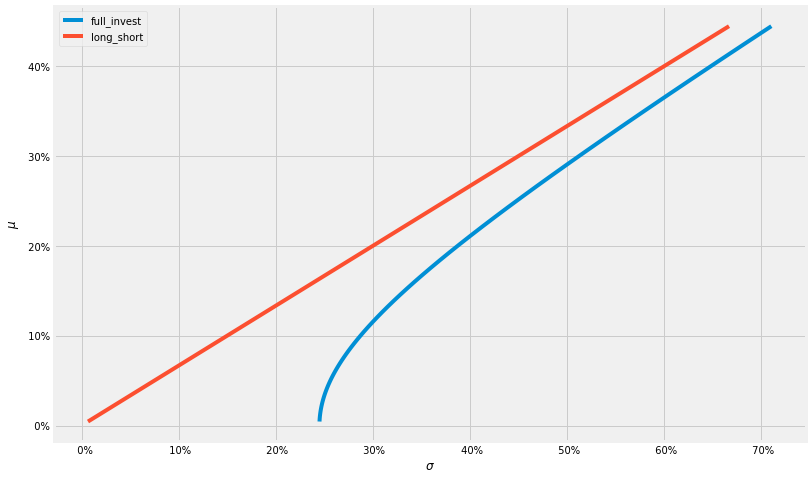

In [43]:
fig = plt.figure(figsize=(12, 8))
plt.plot(df['full_invest'], df['mu'])
plt.plot(df['long_short'], df['mu2'])
ax = fig.get_axes()[0]
plt.legend(labels=['full_invest', 'long_short'])
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')

# manipulate
vals = ax.get_yticks()
_ = ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

vals = ax.get_xticks()
_ = ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals])